# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
file_id = "1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm"
file_url = f"https://drive.google.com/uc?id={file_id}"

In [39]:
df = pd.read_csv(file_url)
print(df.head(15))

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
1   2012-01-02           10.9      10.6       2.8   4.5     rain
2   2012-01-03            0.8      11.7       7.2   2.3     rain
3   2012-01-04           20.3      12.2       5.6   4.7     rain
4   2012-01-05            1.3       8.9       2.8   6.1     rain
5   2012-01-06            2.5       4.4       2.2   2.2     rain
6   2012-01-07            0.0       7.2       2.8   2.3     rain
7   2012-01-08            0.0      10.0       2.8   2.0      sun
8   2012-01-09            4.3       9.4       5.0   3.4     rain
9   2012-01-10            1.0       6.1       0.6   3.4     rain
10  2012-01-11            0.0       6.1      -1.1   5.1      sun
11  2012-01-12            0.0       6.1      -1.7   1.9      sun
12  2012-01-13            0.0       5.0      -2.8   1.3      sun
13  2012-01-14            4.1       4.4       0.6   5.3     snow
14  2012-01-15           

2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [40]:
print(df.isnull().sum())
df = df.dropna()
print(df.info())


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [41]:
df = df.drop("date", axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [42]:
print("Jumlah data duplikat sebelum penghapusan:", df.duplicated().sum())
df = df.drop_duplicates()
print(df.info())

Jumlah data duplikat sebelum penghapusan: 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1453 non-null   float64
 1   temp_max       1453 non-null   float64
 2   temp_min       1453 non-null   float64
 3   wind           1453 non-null   float64
 4   weather        1453 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.1+ KB
None


## **Visualisasi**

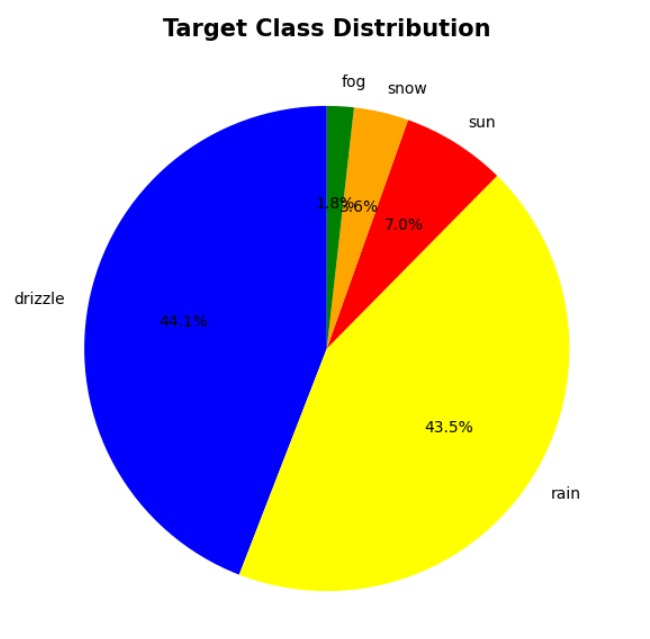

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

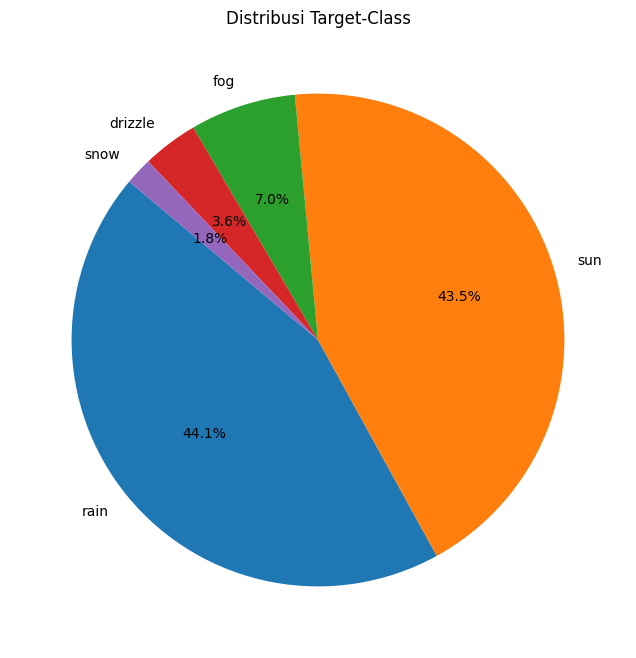

In [43]:
category_counts = df['weather'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Target-Class')
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagramscatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!



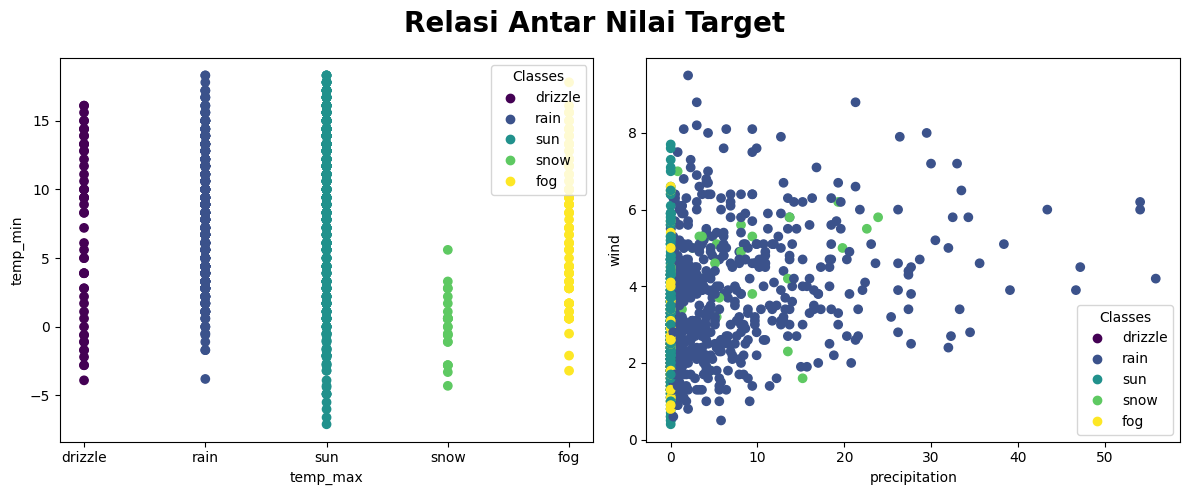

In [50]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun': 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['weather'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

<Axes: xlabel='temp_min', ylabel='Count'>

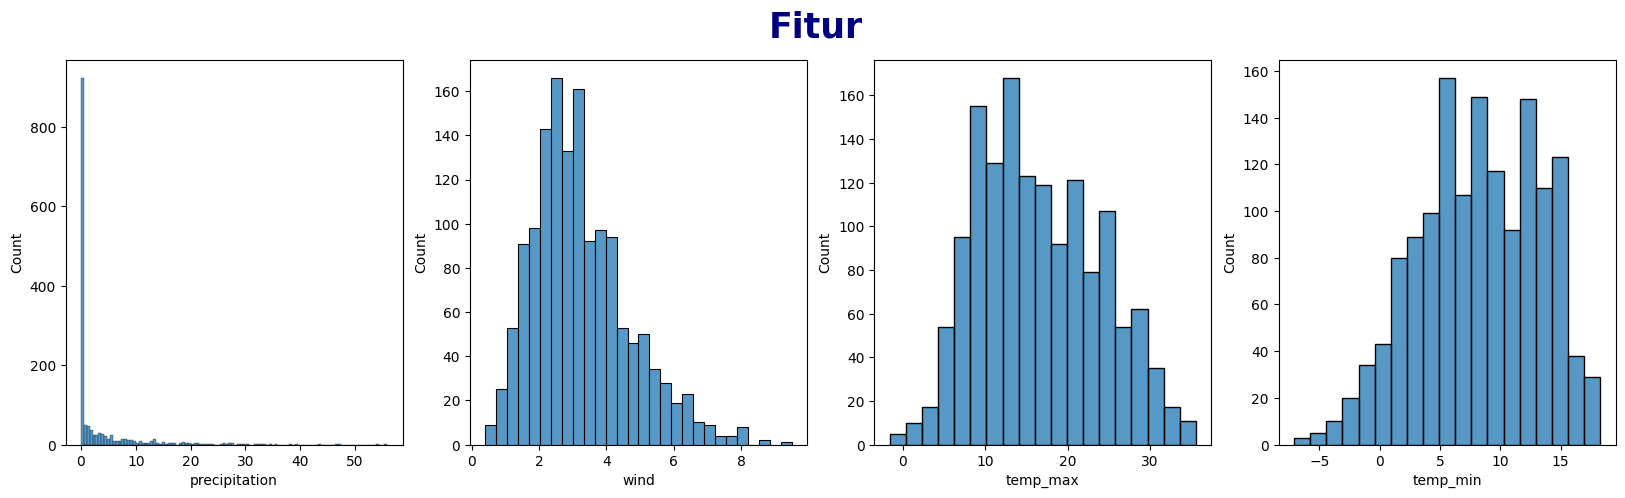

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [53]:
from sklearn.model_selection import train_test_split

# A.Kolom fitur (X)
X = df.drop(columns=['weather'])  # Menghilangkan kolom 'weather' sebagai target

# B.Kolom target (y)
y = df['weather']

# C.Memisahkan dataset menjadi train-set (70%) dan test-set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan jumlah data dalam train-set dan test-set
print("Jumlah data dalam train-set:", len(X_train))
print("Jumlah data dalam test-set:", len(X_test))

Jumlah data dalam train-set: 1017
Jumlah data dalam test-set: 436


6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

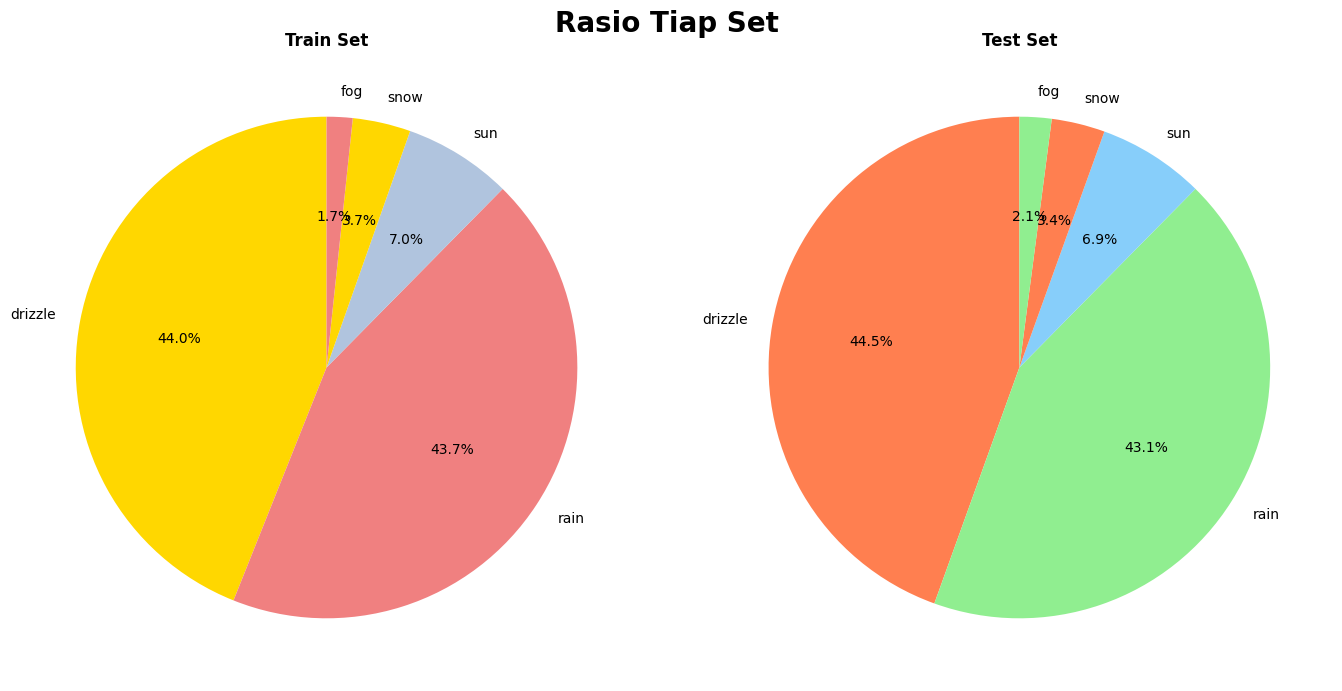

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['precipitation', 'wind', 'temp_max', 'temp_min']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [63]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)


print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.7385321100917431
Laporan Klasifikasi:
               precision    recall  f1-score   support

     drizzle       1.00      0.00      0.00        15
         fog       1.00      0.00      0.00        30
        rain       0.86      0.77      0.81       194
        snow       1.00      0.00      0.00         9
         sun       0.66      0.92      0.77       188

    accuracy                           0.74       436
   macro avg       0.90      0.34      0.32       436
weighted avg       0.79      0.74      0.69       436



## **Esai**



9. Berikan kesimpulan dari project yang telah anda buat.


Dalam proyek ini, kami telah melakukan analisis dan pemodelan prediksi cuaca menggunakan algoritma klasifikasi Naive Bayes. Berikut adalah kesimpulan utama dari proyek ini:

Data Preprocessing: Kami memulai dengan mengimpor data cuaca dari file CSV menggunakan Pandas. Kami juga melakukan beberapa langkah pemrosesan data seperti menghilangkan nilai yang hilang (missing values) dan mengatasi duplikasi.

Eksplorasi Data: Kami menjelajahi data cuaca dengan visualisasi grafik seperti pie chart, scatter plot, dan histogram untuk memahami distribusi dan hubungan antara berbagai fitur.

Pemilihan Fitur: Kami memilih fitur-fitur yang sesuai untuk digunakan dalam model klasifikasi, dan kami melakukan transformasi pada beberapa fitur yang memiliki nilai negatif.

Model Klasifikasi Naive Bayes: Kami menggunakan algoritma klasifikasi Naive Bayes, khususnya Multinomial Naive Bayes, untuk membangun model klasifikasi. Model ini digunakan untuk memprediksi jenis cuaca berdasarkan fitur-fitur yang ada.

Evaluasi Model: Kami mengevaluasi model klasifikasi dengan mengukur akurasi dan melihat laporan klasifikasi yang mencakup metrik seperti presisi, recall, dan F1-score. Kami juga mengatasi peringatan "UndefinedMetricWarning" dengan mengatur parameter zero_division.

Kesimpulannya, proyek ini berhasil membuat model klasifikasi Naive Bayes yang dapat memprediksi jenis cuaca berdasarkan data cuaca yang diberikan. Evaluasi model menunjukkan seberapa baik model ini dapat mengklasifikasikan cuaca dengan akurasi tertentu. Dalam proyek selanjutnya, Anda dapat memperluas analisis ini dengan meningkatkan jumlah data, mencoba berbagai algoritma klasifikasi lainnya, atau melakukan peningkatan lebih lanjut pada pemrosesan data.

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [ ]:
link_video = ""
link_github = "https://github.com/kngr1234/UTS_BK"